# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

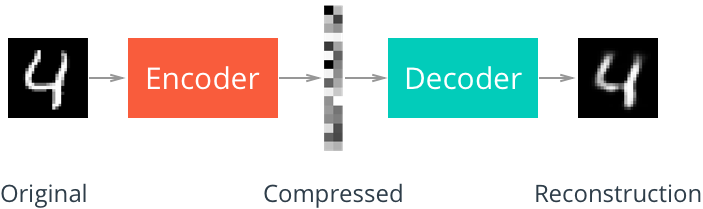(C:\Users\zhangwenqi\Desktop\data_for_neural_network\assetsassets\autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(r'C:\Users\zhangwenqi\Desktop\神经网络test\第二课卷积神经网络\4自编码器\MNIST_data', validation_size=0)

Extracting C:\Users\zhangwenqi\Desktop\神经网络test\第二课卷积神经网络\4自编码器\MNIST_data\train-images-idx3-ubyte.gz
Extracting C:\Users\zhangwenqi\Desktop\神经网络test\第二课卷积神经网络\4自编码器\MNIST_data\train-labels-idx1-ubyte.gz
Extracting C:\Users\zhangwenqi\Desktop\神经网络test\第二课卷积神经网络\4自编码器\MNIST_data\t10k-images-idx3-ubyte.gz
Extracting C:\Users\zhangwenqi\Desktop\神经网络test\第二课卷积神经网络\4自编码器\MNIST_data\t10k-labels-idx1-ubyte.gz


In [10]:
mnist.train.images[0] #数据集中的数据已经是被重塑成一维数据784个元素

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [7]:
img = mnist.train.images
np.shape(img)

(60000, 784)

Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

(28, 28)


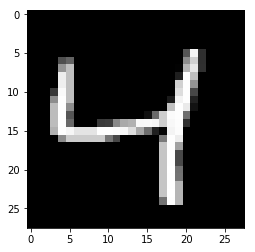

In [15]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')
print(np.shape(img.reshape(28,28)))

In [23]:
print(np.shape(mnist.train.labels))

(60000,)


In [25]:
mnist.train.labels[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

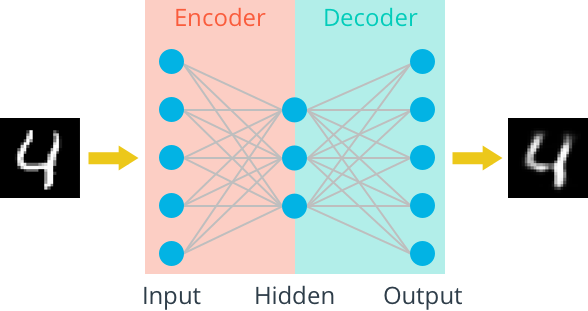
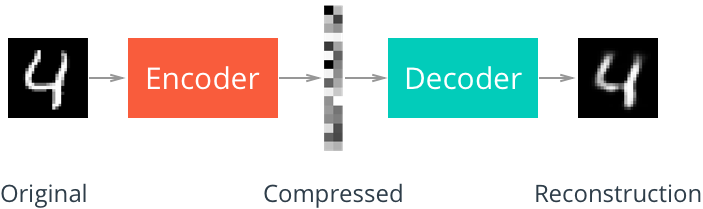 
> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

## 在整个简单神经网络中，自编码器的输出标签=输入向量
## 目的在于通过神经网络来寻找合适的权重编码，然后进行压缩输入的784向量成32维

In [86]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value
image_size=28*28
# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')#不关心标签，只关心能否恢复图片，即输出标签=输入向量

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded =  tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)#隐藏层32个节点也是编码维度

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None) #解码过程，32维的向量恢复成784维度，
#这里不采用激活函数，因为这里希望是线性组合

# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')#最后再用激活函数将784维向量压缩至0-1区间

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
#tensorflow交叉熵计算函数输入中的logits都不是softmax或sigmoid的输出，而是softmax或sigmoid函数的输入
#因为它在函数内部进行sigmoid或softmax操作。而且不能在交叉熵函数前进行softmax或sigmoid，会导致计算会出错。
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [87]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [88]:
batch = mnist.train.next_batch(200)
np.shape(batch[0])#batch中含有图片输入数据和标签两类信息

(200, 784)

In [89]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}#输入=输出
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)#输出[cost, opt]

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.7033
Epoch: 1/20... Training loss: 0.6509
Epoch: 1/20... Training loss: 0.5991
Epoch: 1/20... Training loss: 0.5433
Epoch: 1/20... Training loss: 0.4789
Epoch: 1/20... Training loss: 0.4185
Epoch: 1/20... Training loss: 0.3690
Epoch: 1/20... Training loss: 0.3419
Epoch: 1/20... Training loss: 0.3060
Epoch: 1/20... Training loss: 0.3051
Epoch: 1/20... Training loss: 0.2911
Epoch: 1/20... Training loss: 0.2893
Epoch: 1/20... Training loss: 0.2818
Epoch: 1/20... Training loss: 0.2668
Epoch: 1/20... Training loss: 0.2860
Epoch: 1/20... Training loss: 0.2610
Epoch: 1/20... Training loss: 0.2572
Epoch: 1/20... Training loss: 0.2562
Epoch: 1/20... Training loss: 0.2493
Epoch: 1/20... Training loss: 0.2455
Epoch: 1/20... Training loss: 0.2387
Epoch: 1/20... Training loss: 0.2300
Epoch: 1/20... Training loss: 0.2413
Epoch: 1/20... Training loss: 0.2355
Epoch: 1/20... Training loss: 0.2227
Epoch: 1/20... Training loss: 0.2210
Epoch: 1/20... Training loss: 0.2126
E

Epoch: 1/20... Training loss: 0.0875
Epoch: 1/20... Training loss: 0.0870
Epoch: 1/20... Training loss: 0.0841
Epoch: 1/20... Training loss: 0.0880
Epoch: 1/20... Training loss: 0.0883
Epoch: 1/20... Training loss: 0.0864
Epoch: 1/20... Training loss: 0.0839
Epoch: 1/20... Training loss: 0.0893
Epoch: 1/20... Training loss: 0.0842
Epoch: 1/20... Training loss: 0.0883
Epoch: 1/20... Training loss: 0.0898
Epoch: 1/20... Training loss: 0.0868
Epoch: 1/20... Training loss: 0.0845
Epoch: 1/20... Training loss: 0.0876
Epoch: 1/20... Training loss: 0.0846
Epoch: 1/20... Training loss: 0.0851
Epoch: 1/20... Training loss: 0.0879
Epoch: 1/20... Training loss: 0.0856
Epoch: 1/20... Training loss: 0.0830
Epoch: 1/20... Training loss: 0.0853
Epoch: 1/20... Training loss: 0.0857
Epoch: 1/20... Training loss: 0.0867
Epoch: 1/20... Training loss: 0.0826
Epoch: 1/20... Training loss: 0.0847
Epoch: 1/20... Training loss: 0.0845
Epoch: 1/20... Training loss: 0.0820
Epoch: 1/20... Training loss: 0.0841
E

Epoch: 2/20... Training loss: 0.0739
Epoch: 2/20... Training loss: 0.0743
Epoch: 2/20... Training loss: 0.0741
Epoch: 2/20... Training loss: 0.0747
Epoch: 2/20... Training loss: 0.0739
Epoch: 2/20... Training loss: 0.0723
Epoch: 2/20... Training loss: 0.0734
Epoch: 2/20... Training loss: 0.0741
Epoch: 2/20... Training loss: 0.0727
Epoch: 2/20... Training loss: 0.0716
Epoch: 2/20... Training loss: 0.0722
Epoch: 2/20... Training loss: 0.0719
Epoch: 2/20... Training loss: 0.0725
Epoch: 2/20... Training loss: 0.0723
Epoch: 2/20... Training loss: 0.0729
Epoch: 2/20... Training loss: 0.0729
Epoch: 2/20... Training loss: 0.0736
Epoch: 2/20... Training loss: 0.0727
Epoch: 2/20... Training loss: 0.0729
Epoch: 2/20... Training loss: 0.0718
Epoch: 2/20... Training loss: 0.0738
Epoch: 2/20... Training loss: 0.0745
Epoch: 2/20... Training loss: 0.0737
Epoch: 2/20... Training loss: 0.0719
Epoch: 2/20... Training loss: 0.0732
Epoch: 2/20... Training loss: 0.0722
Epoch: 2/20... Training loss: 0.0726
E

Epoch: 3/20... Training loss: 0.0707
Epoch: 3/20... Training loss: 0.0719
Epoch: 3/20... Training loss: 0.0676
Epoch: 3/20... Training loss: 0.0702
Epoch: 3/20... Training loss: 0.0683
Epoch: 3/20... Training loss: 0.0698
Epoch: 3/20... Training loss: 0.0701
Epoch: 3/20... Training loss: 0.0693
Epoch: 3/20... Training loss: 0.0715
Epoch: 3/20... Training loss: 0.0690
Epoch: 3/20... Training loss: 0.0701
Epoch: 3/20... Training loss: 0.0682
Epoch: 3/20... Training loss: 0.0698
Epoch: 3/20... Training loss: 0.0704
Epoch: 3/20... Training loss: 0.0665
Epoch: 3/20... Training loss: 0.0680
Epoch: 3/20... Training loss: 0.0702
Epoch: 3/20... Training loss: 0.0687
Epoch: 3/20... Training loss: 0.0703
Epoch: 3/20... Training loss: 0.0682
Epoch: 3/20... Training loss: 0.0706
Epoch: 3/20... Training loss: 0.0685
Epoch: 3/20... Training loss: 0.0705
Epoch: 3/20... Training loss: 0.0682
Epoch: 3/20... Training loss: 0.0702
Epoch: 3/20... Training loss: 0.0684
Epoch: 3/20... Training loss: 0.0692
E

Epoch: 4/20... Training loss: 0.0694
Epoch: 4/20... Training loss: 0.0662
Epoch: 4/20... Training loss: 0.0676
Epoch: 4/20... Training loss: 0.0660
Epoch: 4/20... Training loss: 0.0691
Epoch: 4/20... Training loss: 0.0691
Epoch: 4/20... Training loss: 0.0654
Epoch: 4/20... Training loss: 0.0676
Epoch: 4/20... Training loss: 0.0670
Epoch: 4/20... Training loss: 0.0665
Epoch: 4/20... Training loss: 0.0680
Epoch: 4/20... Training loss: 0.0684
Epoch: 4/20... Training loss: 0.0669
Epoch: 4/20... Training loss: 0.0671
Epoch: 4/20... Training loss: 0.0676
Epoch: 4/20... Training loss: 0.0671
Epoch: 4/20... Training loss: 0.0660
Epoch: 4/20... Training loss: 0.0662
Epoch: 4/20... Training loss: 0.0684
Epoch: 4/20... Training loss: 0.0685
Epoch: 4/20... Training loss: 0.0660
Epoch: 4/20... Training loss: 0.0682
Epoch: 4/20... Training loss: 0.0655
Epoch: 4/20... Training loss: 0.0690
Epoch: 4/20... Training loss: 0.0677
Epoch: 4/20... Training loss: 0.0696
Epoch: 4/20... Training loss: 0.0678
E

Epoch: 4/20... Training loss: 0.0662
Epoch: 4/20... Training loss: 0.0672
Epoch: 4/20... Training loss: 0.0645
Epoch: 4/20... Training loss: 0.0679
Epoch: 4/20... Training loss: 0.0639
Epoch: 4/20... Training loss: 0.0673
Epoch: 4/20... Training loss: 0.0665
Epoch: 4/20... Training loss: 0.0669
Epoch: 4/20... Training loss: 0.0669
Epoch: 4/20... Training loss: 0.0671
Epoch: 4/20... Training loss: 0.0656
Epoch: 4/20... Training loss: 0.0667
Epoch: 4/20... Training loss: 0.0681
Epoch: 4/20... Training loss: 0.0666
Epoch: 4/20... Training loss: 0.0652
Epoch: 4/20... Training loss: 0.0657
Epoch: 4/20... Training loss: 0.0653
Epoch: 4/20... Training loss: 0.0659
Epoch: 4/20... Training loss: 0.0654
Epoch: 4/20... Training loss: 0.0675
Epoch: 4/20... Training loss: 0.0647
Epoch: 4/20... Training loss: 0.0655
Epoch: 4/20... Training loss: 0.0662
Epoch: 4/20... Training loss: 0.0665
Epoch: 4/20... Training loss: 0.0663
Epoch: 4/20... Training loss: 0.0683
Epoch: 4/20... Training loss: 0.0662
E

Epoch: 5/20... Training loss: 0.0652
Epoch: 5/20... Training loss: 0.0660
Epoch: 5/20... Training loss: 0.0661
Epoch: 5/20... Training loss: 0.0649
Epoch: 5/20... Training loss: 0.0645
Epoch: 5/20... Training loss: 0.0661
Epoch: 5/20... Training loss: 0.0676
Epoch: 5/20... Training loss: 0.0674
Epoch: 5/20... Training loss: 0.0660
Epoch: 5/20... Training loss: 0.0655
Epoch: 5/20... Training loss: 0.0658
Epoch: 5/20... Training loss: 0.0668
Epoch: 5/20... Training loss: 0.0648
Epoch: 5/20... Training loss: 0.0649
Epoch: 5/20... Training loss: 0.0664
Epoch: 5/20... Training loss: 0.0651
Epoch: 5/20... Training loss: 0.0658
Epoch: 5/20... Training loss: 0.0655
Epoch: 5/20... Training loss: 0.0650
Epoch: 5/20... Training loss: 0.0657
Epoch: 5/20... Training loss: 0.0645
Epoch: 5/20... Training loss: 0.0671
Epoch: 5/20... Training loss: 0.0657
Epoch: 5/20... Training loss: 0.0646
Epoch: 5/20... Training loss: 0.0669
Epoch: 5/20... Training loss: 0.0665
Epoch: 5/20... Training loss: 0.0644
E

Epoch: 6/20... Training loss: 0.0681
Epoch: 6/20... Training loss: 0.0656
Epoch: 6/20... Training loss: 0.0648
Epoch: 6/20... Training loss: 0.0660
Epoch: 6/20... Training loss: 0.0646
Epoch: 6/20... Training loss: 0.0643
Epoch: 6/20... Training loss: 0.0664
Epoch: 6/20... Training loss: 0.0659
Epoch: 6/20... Training loss: 0.0647
Epoch: 6/20... Training loss: 0.0649
Epoch: 6/20... Training loss: 0.0668
Epoch: 6/20... Training loss: 0.0663
Epoch: 6/20... Training loss: 0.0675
Epoch: 6/20... Training loss: 0.0641
Epoch: 6/20... Training loss: 0.0622
Epoch: 6/20... Training loss: 0.0665
Epoch: 6/20... Training loss: 0.0643
Epoch: 6/20... Training loss: 0.0642
Epoch: 6/20... Training loss: 0.0641
Epoch: 6/20... Training loss: 0.0645
Epoch: 6/20... Training loss: 0.0660
Epoch: 6/20... Training loss: 0.0674
Epoch: 6/20... Training loss: 0.0652
Epoch: 6/20... Training loss: 0.0658
Epoch: 6/20... Training loss: 0.0639
Epoch: 6/20... Training loss: 0.0666
Epoch: 6/20... Training loss: 0.0625
E

Epoch: 7/20... Training loss: 0.0645
Epoch: 7/20... Training loss: 0.0656
Epoch: 7/20... Training loss: 0.0629
Epoch: 7/20... Training loss: 0.0648
Epoch: 7/20... Training loss: 0.0641
Epoch: 7/20... Training loss: 0.0659
Epoch: 7/20... Training loss: 0.0644
Epoch: 7/20... Training loss: 0.0637
Epoch: 7/20... Training loss: 0.0646
Epoch: 7/20... Training loss: 0.0658
Epoch: 7/20... Training loss: 0.0677
Epoch: 7/20... Training loss: 0.0659
Epoch: 7/20... Training loss: 0.0641
Epoch: 7/20... Training loss: 0.0670
Epoch: 7/20... Training loss: 0.0658
Epoch: 7/20... Training loss: 0.0649
Epoch: 7/20... Training loss: 0.0658
Epoch: 7/20... Training loss: 0.0644
Epoch: 7/20... Training loss: 0.0656
Epoch: 7/20... Training loss: 0.0661
Epoch: 7/20... Training loss: 0.0642
Epoch: 7/20... Training loss: 0.0657
Epoch: 7/20... Training loss: 0.0641
Epoch: 7/20... Training loss: 0.0666
Epoch: 7/20... Training loss: 0.0630
Epoch: 7/20... Training loss: 0.0655
Epoch: 7/20... Training loss: 0.0658
E

Epoch: 7/20... Training loss: 0.0646
Epoch: 7/20... Training loss: 0.0649
Epoch: 7/20... Training loss: 0.0654
Epoch: 7/20... Training loss: 0.0648
Epoch: 7/20... Training loss: 0.0648
Epoch: 7/20... Training loss: 0.0650
Epoch: 7/20... Training loss: 0.0644
Epoch: 7/20... Training loss: 0.0656
Epoch: 7/20... Training loss: 0.0631
Epoch: 7/20... Training loss: 0.0652
Epoch: 7/20... Training loss: 0.0647
Epoch: 7/20... Training loss: 0.0665
Epoch: 7/20... Training loss: 0.0636
Epoch: 7/20... Training loss: 0.0644
Epoch: 7/20... Training loss: 0.0632
Epoch: 7/20... Training loss: 0.0652
Epoch: 7/20... Training loss: 0.0650
Epoch: 7/20... Training loss: 0.0652
Epoch: 7/20... Training loss: 0.0665
Epoch: 7/20... Training loss: 0.0670
Epoch: 7/20... Training loss: 0.0631
Epoch: 7/20... Training loss: 0.0648
Epoch: 7/20... Training loss: 0.0637
Epoch: 7/20... Training loss: 0.0632
Epoch: 7/20... Training loss: 0.0646
Epoch: 7/20... Training loss: 0.0656
Epoch: 7/20... Training loss: 0.0643
E

Epoch: 8/20... Training loss: 0.0648
Epoch: 8/20... Training loss: 0.0654
Epoch: 8/20... Training loss: 0.0667
Epoch: 8/20... Training loss: 0.0647
Epoch: 8/20... Training loss: 0.0645
Epoch: 8/20... Training loss: 0.0647
Epoch: 8/20... Training loss: 0.0639
Epoch: 8/20... Training loss: 0.0645
Epoch: 8/20... Training loss: 0.0641
Epoch: 8/20... Training loss: 0.0647
Epoch: 8/20... Training loss: 0.0650
Epoch: 8/20... Training loss: 0.0634
Epoch: 8/20... Training loss: 0.0623
Epoch: 8/20... Training loss: 0.0655
Epoch: 8/20... Training loss: 0.0651
Epoch: 8/20... Training loss: 0.0639
Epoch: 8/20... Training loss: 0.0634
Epoch: 8/20... Training loss: 0.0646
Epoch: 8/20... Training loss: 0.0657
Epoch: 8/20... Training loss: 0.0650
Epoch: 8/20... Training loss: 0.0640
Epoch: 8/20... Training loss: 0.0633
Epoch: 8/20... Training loss: 0.0644
Epoch: 8/20... Training loss: 0.0647
Epoch: 8/20... Training loss: 0.0644
Epoch: 8/20... Training loss: 0.0648
Epoch: 8/20... Training loss: 0.0642
E

Epoch: 9/20... Training loss: 0.0639
Epoch: 9/20... Training loss: 0.0639
Epoch: 9/20... Training loss: 0.0663
Epoch: 9/20... Training loss: 0.0658
Epoch: 9/20... Training loss: 0.0658
Epoch: 9/20... Training loss: 0.0645
Epoch: 9/20... Training loss: 0.0644
Epoch: 9/20... Training loss: 0.0644
Epoch: 9/20... Training loss: 0.0631
Epoch: 9/20... Training loss: 0.0655
Epoch: 9/20... Training loss: 0.0633
Epoch: 9/20... Training loss: 0.0623
Epoch: 9/20... Training loss: 0.0664
Epoch: 9/20... Training loss: 0.0658
Epoch: 9/20... Training loss: 0.0641
Epoch: 9/20... Training loss: 0.0654
Epoch: 9/20... Training loss: 0.0657
Epoch: 9/20... Training loss: 0.0659
Epoch: 9/20... Training loss: 0.0638
Epoch: 9/20... Training loss: 0.0649
Epoch: 9/20... Training loss: 0.0635
Epoch: 9/20... Training loss: 0.0646
Epoch: 9/20... Training loss: 0.0646
Epoch: 9/20... Training loss: 0.0644
Epoch: 9/20... Training loss: 0.0635
Epoch: 9/20... Training loss: 0.0628
Epoch: 9/20... Training loss: 0.0651
E

Epoch: 10/20... Training loss: 0.0633
Epoch: 10/20... Training loss: 0.0637
Epoch: 10/20... Training loss: 0.0643
Epoch: 10/20... Training loss: 0.0619
Epoch: 10/20... Training loss: 0.0637
Epoch: 10/20... Training loss: 0.0629
Epoch: 10/20... Training loss: 0.0656
Epoch: 10/20... Training loss: 0.0630
Epoch: 10/20... Training loss: 0.0643
Epoch: 10/20... Training loss: 0.0644
Epoch: 10/20... Training loss: 0.0649
Epoch: 10/20... Training loss: 0.0637
Epoch: 10/20... Training loss: 0.0655
Epoch: 10/20... Training loss: 0.0642
Epoch: 10/20... Training loss: 0.0635
Epoch: 10/20... Training loss: 0.0633
Epoch: 10/20... Training loss: 0.0641
Epoch: 10/20... Training loss: 0.0646
Epoch: 10/20... Training loss: 0.0650
Epoch: 10/20... Training loss: 0.0649
Epoch: 10/20... Training loss: 0.0653
Epoch: 10/20... Training loss: 0.0658
Epoch: 10/20... Training loss: 0.0649
Epoch: 10/20... Training loss: 0.0662
Epoch: 10/20... Training loss: 0.0652
Epoch: 10/20... Training loss: 0.0657
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0642
Epoch: 10/20... Training loss: 0.0633
Epoch: 10/20... Training loss: 0.0625
Epoch: 10/20... Training loss: 0.0647
Epoch: 10/20... Training loss: 0.0647
Epoch: 10/20... Training loss: 0.0633
Epoch: 10/20... Training loss: 0.0652
Epoch: 10/20... Training loss: 0.0633
Epoch: 10/20... Training loss: 0.0667
Epoch: 10/20... Training loss: 0.0644
Epoch: 10/20... Training loss: 0.0653
Epoch: 10/20... Training loss: 0.0641
Epoch: 10/20... Training loss: 0.0632
Epoch: 10/20... Training loss: 0.0645
Epoch: 10/20... Training loss: 0.0656
Epoch: 10/20... Training loss: 0.0635
Epoch: 10/20... Training loss: 0.0647
Epoch: 10/20... Training loss: 0.0647
Epoch: 10/20... Training loss: 0.0652
Epoch: 10/20... Training loss: 0.0632
Epoch: 10/20... Training loss: 0.0650
Epoch: 10/20... Training loss: 0.0624
Epoch: 10/20... Training loss: 0.0644
Epoch: 10/20... Training loss: 0.0620
Epoch: 10/20... Training loss: 0.0633
Epoch: 10/20... Training loss: 0.0651
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0637
Epoch: 11/20... Training loss: 0.0654
Epoch: 11/20... Training loss: 0.0648
Epoch: 11/20... Training loss: 0.0654
Epoch: 11/20... Training loss: 0.0635
Epoch: 11/20... Training loss: 0.0651
Epoch: 11/20... Training loss: 0.0666
Epoch: 11/20... Training loss: 0.0638
Epoch: 11/20... Training loss: 0.0629
Epoch: 11/20... Training loss: 0.0638
Epoch: 11/20... Training loss: 0.0621
Epoch: 11/20... Training loss: 0.0649
Epoch: 11/20... Training loss: 0.0657
Epoch: 11/20... Training loss: 0.0645
Epoch: 11/20... Training loss: 0.0649
Epoch: 11/20... Training loss: 0.0640
Epoch: 11/20... Training loss: 0.0661
Epoch: 11/20... Training loss: 0.0644
Epoch: 11/20... Training loss: 0.0643
Epoch: 11/20... Training loss: 0.0628
Epoch: 11/20... Training loss: 0.0633
Epoch: 11/20... Training loss: 0.0648
Epoch: 11/20... Training loss: 0.0634
Epoch: 11/20... Training loss: 0.0641
Epoch: 11/20... Training loss: 0.0635
Epoch: 11/20... Training loss: 0.0623
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0636
Epoch: 12/20... Training loss: 0.0641
Epoch: 12/20... Training loss: 0.0649
Epoch: 12/20... Training loss: 0.0646
Epoch: 12/20... Training loss: 0.0641
Epoch: 12/20... Training loss: 0.0643
Epoch: 12/20... Training loss: 0.0635
Epoch: 12/20... Training loss: 0.0637
Epoch: 12/20... Training loss: 0.0626
Epoch: 12/20... Training loss: 0.0639
Epoch: 12/20... Training loss: 0.0648
Epoch: 12/20... Training loss: 0.0636
Epoch: 12/20... Training loss: 0.0631
Epoch: 12/20... Training loss: 0.0642
Epoch: 12/20... Training loss: 0.0625
Epoch: 12/20... Training loss: 0.0629
Epoch: 12/20... Training loss: 0.0646
Epoch: 12/20... Training loss: 0.0639
Epoch: 12/20... Training loss: 0.0634
Epoch: 12/20... Training loss: 0.0640
Epoch: 12/20... Training loss: 0.0648
Epoch: 12/20... Training loss: 0.0652
Epoch: 12/20... Training loss: 0.0636
Epoch: 12/20... Training loss: 0.0636
Epoch: 12/20... Training loss: 0.0643
Epoch: 12/20... Training loss: 0.0635
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0625
Epoch: 12/20... Training loss: 0.0645
Epoch: 13/20... Training loss: 0.0650
Epoch: 13/20... Training loss: 0.0655
Epoch: 13/20... Training loss: 0.0648
Epoch: 13/20... Training loss: 0.0608
Epoch: 13/20... Training loss: 0.0640
Epoch: 13/20... Training loss: 0.0642
Epoch: 13/20... Training loss: 0.0637
Epoch: 13/20... Training loss: 0.0630
Epoch: 13/20... Training loss: 0.0636
Epoch: 13/20... Training loss: 0.0630
Epoch: 13/20... Training loss: 0.0634
Epoch: 13/20... Training loss: 0.0633
Epoch: 13/20... Training loss: 0.0634
Epoch: 13/20... Training loss: 0.0628
Epoch: 13/20... Training loss: 0.0629
Epoch: 13/20... Training loss: 0.0632
Epoch: 13/20... Training loss: 0.0636
Epoch: 13/20... Training loss: 0.0638
Epoch: 13/20... Training loss: 0.0651
Epoch: 13/20... Training loss: 0.0624
Epoch: 13/20... Training loss: 0.0654
Epoch: 13/20... Training loss: 0.0615
Epoch: 13/20... Training loss: 0.0636
Epoch: 13/20... Training loss: 0.0646
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0652
Epoch: 13/20... Training loss: 0.0622
Epoch: 13/20... Training loss: 0.0620
Epoch: 13/20... Training loss: 0.0646
Epoch: 13/20... Training loss: 0.0642
Epoch: 13/20... Training loss: 0.0632
Epoch: 13/20... Training loss: 0.0646
Epoch: 13/20... Training loss: 0.0654
Epoch: 13/20... Training loss: 0.0632
Epoch: 13/20... Training loss: 0.0635
Epoch: 13/20... Training loss: 0.0648
Epoch: 13/20... Training loss: 0.0634
Epoch: 13/20... Training loss: 0.0644
Epoch: 13/20... Training loss: 0.0645
Epoch: 13/20... Training loss: 0.0656
Epoch: 13/20... Training loss: 0.0654
Epoch: 13/20... Training loss: 0.0634
Epoch: 13/20... Training loss: 0.0639
Epoch: 13/20... Training loss: 0.0632
Epoch: 13/20... Training loss: 0.0637
Epoch: 13/20... Training loss: 0.0625
Epoch: 13/20... Training loss: 0.0657
Epoch: 13/20... Training loss: 0.0648
Epoch: 13/20... Training loss: 0.0645
Epoch: 13/20... Training loss: 0.0624
Epoch: 13/20... Training loss: 0.0654
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0631
Epoch: 14/20... Training loss: 0.0643
Epoch: 14/20... Training loss: 0.0633
Epoch: 14/20... Training loss: 0.0651
Epoch: 14/20... Training loss: 0.0653
Epoch: 14/20... Training loss: 0.0661
Epoch: 14/20... Training loss: 0.0641
Epoch: 14/20... Training loss: 0.0638
Epoch: 14/20... Training loss: 0.0631
Epoch: 14/20... Training loss: 0.0634
Epoch: 14/20... Training loss: 0.0629
Epoch: 14/20... Training loss: 0.0632
Epoch: 14/20... Training loss: 0.0649
Epoch: 14/20... Training loss: 0.0633
Epoch: 14/20... Training loss: 0.0636
Epoch: 14/20... Training loss: 0.0610
Epoch: 14/20... Training loss: 0.0629
Epoch: 14/20... Training loss: 0.0637
Epoch: 14/20... Training loss: 0.0650
Epoch: 14/20... Training loss: 0.0632
Epoch: 14/20... Training loss: 0.0656
Epoch: 14/20... Training loss: 0.0637
Epoch: 14/20... Training loss: 0.0630
Epoch: 14/20... Training loss: 0.0627
Epoch: 14/20... Training loss: 0.0642
Epoch: 14/20... Training loss: 0.0645
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0633
Epoch: 15/20... Training loss: 0.0638
Epoch: 15/20... Training loss: 0.0638
Epoch: 15/20... Training loss: 0.0636
Epoch: 15/20... Training loss: 0.0653
Epoch: 15/20... Training loss: 0.0636
Epoch: 15/20... Training loss: 0.0640
Epoch: 15/20... Training loss: 0.0621
Epoch: 15/20... Training loss: 0.0637
Epoch: 15/20... Training loss: 0.0629
Epoch: 15/20... Training loss: 0.0617
Epoch: 15/20... Training loss: 0.0644
Epoch: 15/20... Training loss: 0.0632
Epoch: 15/20... Training loss: 0.0626
Epoch: 15/20... Training loss: 0.0637
Epoch: 15/20... Training loss: 0.0642
Epoch: 15/20... Training loss: 0.0636
Epoch: 15/20... Training loss: 0.0629
Epoch: 15/20... Training loss: 0.0649
Epoch: 15/20... Training loss: 0.0642
Epoch: 15/20... Training loss: 0.0635
Epoch: 15/20... Training loss: 0.0628
Epoch: 15/20... Training loss: 0.0615
Epoch: 15/20... Training loss: 0.0642
Epoch: 15/20... Training loss: 0.0625
Epoch: 15/20... Training loss: 0.0636
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0623
Epoch: 15/20... Training loss: 0.0640
Epoch: 15/20... Training loss: 0.0637
Epoch: 15/20... Training loss: 0.0612
Epoch: 15/20... Training loss: 0.0621
Epoch: 15/20... Training loss: 0.0629
Epoch: 15/20... Training loss: 0.0641
Epoch: 15/20... Training loss: 0.0655
Epoch: 15/20... Training loss: 0.0642
Epoch: 15/20... Training loss: 0.0636
Epoch: 15/20... Training loss: 0.0646
Epoch: 15/20... Training loss: 0.0642
Epoch: 15/20... Training loss: 0.0628
Epoch: 15/20... Training loss: 0.0650
Epoch: 15/20... Training loss: 0.0634
Epoch: 15/20... Training loss: 0.0640
Epoch: 15/20... Training loss: 0.0636
Epoch: 15/20... Training loss: 0.0641
Epoch: 15/20... Training loss: 0.0644
Epoch: 15/20... Training loss: 0.0623
Epoch: 15/20... Training loss: 0.0643
Epoch: 15/20... Training loss: 0.0641
Epoch: 15/20... Training loss: 0.0624
Epoch: 15/20... Training loss: 0.0620
Epoch: 15/20... Training loss: 0.0629
Epoch: 15/20... Training loss: 0.0628
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0627
Epoch: 16/20... Training loss: 0.0629
Epoch: 16/20... Training loss: 0.0641
Epoch: 16/20... Training loss: 0.0641
Epoch: 16/20... Training loss: 0.0627
Epoch: 16/20... Training loss: 0.0619
Epoch: 16/20... Training loss: 0.0633
Epoch: 16/20... Training loss: 0.0648
Epoch: 16/20... Training loss: 0.0650
Epoch: 16/20... Training loss: 0.0636
Epoch: 16/20... Training loss: 0.0637
Epoch: 16/20... Training loss: 0.0635
Epoch: 16/20... Training loss: 0.0621
Epoch: 16/20... Training loss: 0.0657
Epoch: 16/20... Training loss: 0.0631
Epoch: 16/20... Training loss: 0.0616
Epoch: 16/20... Training loss: 0.0648
Epoch: 16/20... Training loss: 0.0631
Epoch: 16/20... Training loss: 0.0635
Epoch: 16/20... Training loss: 0.0626
Epoch: 16/20... Training loss: 0.0610
Epoch: 16/20... Training loss: 0.0627
Epoch: 16/20... Training loss: 0.0648
Epoch: 16/20... Training loss: 0.0639
Epoch: 16/20... Training loss: 0.0629
Epoch: 16/20... Training loss: 0.0646
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0643
Epoch: 17/20... Training loss: 0.0638
Epoch: 17/20... Training loss: 0.0631
Epoch: 17/20... Training loss: 0.0667
Epoch: 17/20... Training loss: 0.0614
Epoch: 17/20... Training loss: 0.0651
Epoch: 17/20... Training loss: 0.0631
Epoch: 17/20... Training loss: 0.0646
Epoch: 17/20... Training loss: 0.0628
Epoch: 17/20... Training loss: 0.0630


KeyboardInterrupt: 

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

In [90]:
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})#获得压缩至32维的向量和解码后的向量
print(np.shape(compressed))
print(np.shape(reconstructed))

(10, 784)
(10, 784)


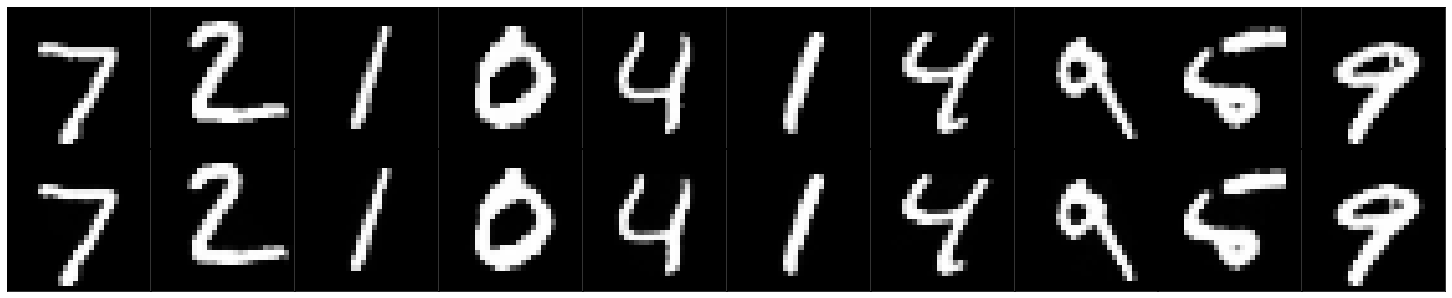

In [91]:

fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.